# Практика

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as sts
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [273]:
# обозначим две монеты и их стороны
M1 = ['head', 'tail'] 
M2 = ['head', 'tail'] 

# задаем число экспериментов
n = 100000

# формируем выборку
M = pd.DataFrame({"M1":list(map(lambda a: random.choice(M1), range(n))),
                  "M2":list(map(lambda a: random.choice(M2), range(n)))
                 })

# пример таблицы
M.head()

,M1,M2
0,head,head
1,tail,head
2,tail,tail
3,head,head
4,head,head


In [274]:
# считаем статистику выпадений разных сторон у двух подброшенных монет
P_diff = len(M[M.M1 != M.M2])/M.shape[0]

print(f'Вероятность, что монеты выпали разными сторонами: {P_diff}')

Вероятность, что монеты выпали разными сторонами: 0.50116


Получили 50/50 - ожидаемо :)

### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [275]:
# обозначим три монеты и их стороны
M1 = ['head', 'tail'] 
M2 = ['head', 'tail'] 
M3 = ['head', 'tail'] 

# задаем число экспериментов
n = 10000

# формируем выборку
M = pd.DataFrame({"M1":list(map(lambda a: random.choice(M1), range(n))),
                  "M2":list(map(lambda a: random.choice(M2), range(n))),
                  "M3":list(map(lambda a: random.choice(M3), range(n)))                  
                 })

# пример таблицы
M.head()

,M1,M2,M3
0,head,head,head
1,tail,head,head
2,head,tail,head
3,head,head,head
4,head,tail,head


Cчитаем статистику выпадений 

In [276]:
# A = {не выпало ни одного герба}

# все результаты, где не выпал герб ни на одной из монет, делим на общее число подбрасываний
P_tail = len(M.query('M1 != "head" & M2 != "head" & M3 != "head"'))/M.shape[0]

print('Вероятность события "A = {не выпало ни одного герба}:"', P_tail)

Вероятность события "A = {не выпало ни одного герба}:" 0.122


In [277]:
# B = {выпало четное число гербов}

# задаём счётчик и столбец, куда будем складывать результаты счётчика
A = 0
M['A'] = A

# проходим по строкам (один цикл подбрасывания трёх монет) и накручиваем счётчик при каждом выпавшем гербе
for i in range(n):
    if M.M1[i] == 'head':
        M['A'][i] += 1
    if M.M2[i] == 'head':
        M['A'][i] += 1    
    if M.M3[i] == 'head':
        M['A'][i] += 1     

print('Пример первых 5-ти строк:')
print("")
print(M.head())
print("")
    
# все результаты с чётным количеством гербов в столбце A делим на общее число подбрасываний
P_even_head = len(M[M['A'] == 2])/M.shape[0]
P_even_head

print('Вероятность события "B = {выпало четное число гербов}:"', P_even_head)

Пример первых 5-ти строк:

     M1    M2    M3  A
0  head  head  head  3
1  tail  head  head  2
2  head  tail  head  2
3  head  head  head  3
4  head  tail  head  2

Вероятность события "B = {выпало четное число гербов}:" 0.3807


In [278]:
# C = {на третьей монете выпал герб}

# все результаты, где герб выпал на третьей монете, делим на общее число подбрасываний
P_M3_head = len(M.query('M3 == "head"'))/M.shape[0]

print('Вероятность события "C = {на третьей монете выпал герб}:"', P_M3_head)

Вероятность события "C = {на третьей монете выпал герб}:" 0.4998



### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [279]:
# обозначим три члена комиссии и варианты решений
K1 = ['рекомендован L', 'рекомендован E', 'не рекомендован никто']
K2 = ['рекомендован L', 'рекомендован E', 'не рекомендован никто']
K3 = ['рекомендован L', 'рекомендован E', 'не рекомендован никто']

# задаем число экспериментов
n = 10000

# формируем выборку
K = pd.DataFrame({"K1":list(map(lambda a: random.choice(K1), range(n))),
                  "K2":list(map(lambda a: random.choice(K2), range(n))),
                  "K3":list(map(lambda a: random.choice(K3), range(n)))                  
                 })

# пример таблицы
K.head()

,K1,K2,K3
0,рекомендован E,рекомендован E,рекомендован E
1,рекомендован E,не рекомендован никто,рекомендован L
2,рекомендован L,рекомендован E,рекомендован E
3,рекомендован E,рекомендован E,рекомендован L
4,рекомендован E,рекомендован L,рекомендован L


In [280]:
# задаём счётчик и столбцы, куда будем складывать результаты счётчика
K['L'] = 0
K['E'] = 0

S = ['L', 'E']

# проходим по строкам (один цикл подбрасывания трёх монет) и накручиваем счётчик для каждого кандидата
for i in range(n):
    for p in S:
        if K.K1[i] == f'рекомендован {p}':
            K[p][i] += 1
        if K.K2[i] == f'рекомендован {p}':
            K[p][i] += 1
        if K.K3[i] == f'рекомендован {p}':
            K[p][i] += 1

print('Пример первых 5-ти строк:')
print("")
print(K.head())

Пример первых 5-ти строк:

               K1                     K2              K3  L  E
0  рекомендован E         рекомендован E  рекомендован E  0  3
1  рекомендован E  не рекомендован никто  рекомендован L  1  1
2  рекомендован L         рекомендован E  рекомендован E  1  2
3  рекомендован E         рекомендован E  рекомендован L  1  2
4  рекомендован E         рекомендован L  рекомендован L  2  1


In [281]:
# A = {рекомендован L}

# все результаты, где кандидата L одобрили хотя бы два члена комиссии
P_L = len(K.query('L >= 2'))/K.shape[0]

print('Вероятность события "A = {рекомендован L}:"', P_L)

Вероятность события "A = {рекомендован L}:" 0.2548


In [282]:
# B = {рекомендован E}

# все результаты, где кандидата E одобрили хотя бы два члена комиссии
P_E = len(K.query('E >= 2'))/K.shape[0]

print('Вероятность события "B = {рекомендован E}:"', P_E)

Вероятность события "B = {рекомендован E}:" 0.2631


У кандидатов одинаковая вероятность быть выбранными, оцениваемая в 1/4.

### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [283]:
# обозначим две игральных кости и варианты событий

IK1 = [1, 2, 3, 4, 5, 6]
IK2 = [1, 2, 3, 4, 5, 6]

# задаем число экспериментов
n = 10000

# формируем выборку
IK = pd.DataFrame({"IK1":list(map(lambda a: random.choice(IK1), range(n))),
                  "IK2":list(map(lambda a: random.choice(IK2), range(n)))                 
                 })

# пример таблицы
IK.head()

,IK1,IK2
0,3,2
1,4,5
2,6,2
3,6,6
4,4,4


In [284]:
# A = {вышло две "шестерки"}

# считаем статистику выпадений двух шестёрок у двух подброшенных кубиков
P_two_6 = len(IK.query('IK1 == 6 & IK2 == 6'))/IK.shape[0]

print('Вероятность события "A = {вышло две "шестерки"}:"', P_two_6)

Вероятность события "A = {вышло две "шестерки"}:" 0.0252


In [285]:
# B = {сумма выпавших очков не меньше 11}

# создадим столбец с суммой очков
IK['SUM'] = IK.IK1 + IK.IK2

# считаем статистику выпадений суммы очков не меньше 11
P_more_10 = len(IK.query('SUM >= 11'))/IK.shape[0]

print('Вероятность события "B = {сумма выпавших очков не меньше 11}:"', P_more_10)

Вероятность события "B = {сумма выпавших очков не меньше 11}:" 0.0789


In [286]:
# C = {не выпала ни одна "шестерка"}

# считаем статистику, когда не выпала ни одна шестёрка у двух подброшенных кубиков
P_not_6 = len(IK.query('IK1 != 6 & IK2 != 6'))/IK.shape[0]

print('Вероятность события "C = {не выпала ни одна "шестерка"}"', P_not_6)

Вероятность события "C = {не выпала ни одна "шестерка"}" 0.7048


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [287]:
# D = {выпала хотя бы одна шестёрка}

# считаем статистику, когда не выпала ни одна шестёрка у двух подброшенных кубиков
P_6 = len(IK.query('IK1 == 6 | IK2 == 6'))/IK.shape[0]

print('Вероятность события "D = {выпала хотя бы одна шестёрка}"', P_6)

Вероятность события "D = {выпала хотя бы одна шестёрка}" 0.2952


### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [288]:
# задаем число экспериментов
n = 10000

# формируем выборку из вариантов событий для трёх цифр
N = pd.DataFrame({"N1":list(map(lambda a: np.random.randint(0, 11), range(n))),
                  "N2":list(map(lambda a: np.random.randint(0, 11), range(n))),         
                  "N3":list(map(lambda a: np.random.randint(0, 11), range(n))),                   
                  })

# пример таблицы
N.head()

,N1,N2,N3
0,3,4,10
1,9,3,6
2,9,9,1
3,9,7,1
4,0,9,1


In [289]:
# A = {Стерлись различные цифры}

# считаем статистику для варианта, когда стёрлось три разные цифры
P_diff_numb = len(N.query('N1 != N2 & N2 != N3'))/N.shape[0]

print('Вероятность события "A = {Стерлись различные цифры}:"', P_diff_numb)

Вероятность события "A = {Стерлись различные цифры}:" 0.8232


In [290]:
# B = {Стерлись одинаковые цифры}

# считаем статистику для варианта, когда стёрлось три одинаковые цифры
P_same_numb = len(N.query('N1 == N2 & N2 == N3'))/N.shape[0]

print('Вероятность события "B = {Стерлись одинаковые цифры}:"', P_same_numb)

Вероятность события "B = {Стерлись одинаковые цифры}:" 0.0084


In [291]:
# C = {Среди стершихся цифр хотя бы две совпадают}

# считаем статистику для варианта, когда хотя бы две стёршиеся цифры совпадают
P_two_same_numb = len(N.query('N1 == N2 | N2 == N3 | N1 == N3'))/N.shape[0]

print('Вероятность события "C = {Среди стершихся цифр хотя бы две совпадают}:"', P_two_same_numb)

Вероятность события "C = {Среди стершихся цифр хотя бы две совпадают}:" 0.2616


In [292]:
# D = {Среди стершихся цифр хотя бы две различны}

# считаем статистику для варианта, когда хотя бы две стёршиеся цифры различны
P_two_same_numb = len(N.query('N1 != N2 | N2 != N3 | N1 != N3'))/N.shape[0]

print('Вероятность события "D = {Среди стершихся цифр хотя бы две различны}:"', P_two_same_numb)

Вероятность события "D = {Среди стершихся цифр хотя бы две различны}:" 0.9916


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

In [294]:
# вероятность успеха 0.1

bernoulli_rv = sts.bernoulli(0.1)

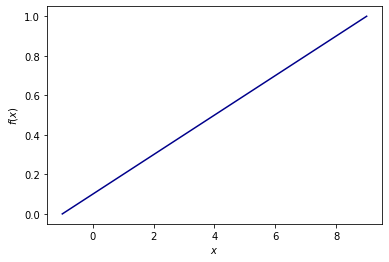

In [301]:
# построим функцию распределения

x = np.linspace(-1, 9, 2)
cdf = bernoulli_rv.cdf(x) # вернёт массив из значений функции распределения
plt.plot(x, cdf, color="darkblue")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.show();

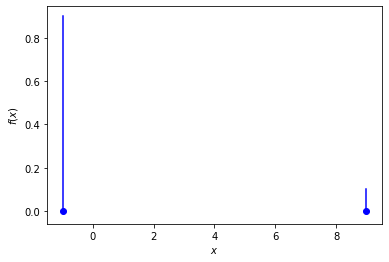

In [302]:
# Функция вероятности pmf для дискретных случайных величин

x = np.linspace(-1,9,2)
pmf = bernoulli_rv.pmf(x) # вернёт массив из значений функции распределения
plt.scatter(x, pmf, color="blue" )
plt.plot((-1,-1), (0,bernoulli_rv.pmf(0)), color="blue")
plt.plot((9,9), (0,bernoulli_rv.pmf(1)), color="blue")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.show();

С вероятностью ~0.9 первый вытащивший билет получит чистую прибыль -1 ден.ед.

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

In [215]:
# мы уже бросали кости в Задаче 4 и там же считали сумму выпавших очков, используем нагенерированные ранее варианты 

IK.head()

,IK1,IK2,SUM
0,4,3,7
1,2,3,5
2,2,3,5
3,6,3,9
4,6,2,8


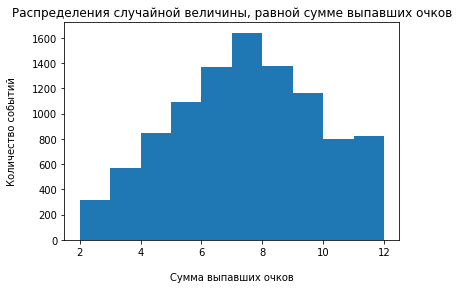

In [214]:
# построим гистограмму распределения суммы выпавших очков

plt.hist(IK.SUM)
plt.title('Распределения случайной величины, равной сумме выпавших очков')
plt.xlabel('Сумма выпавших очков', labelpad = 15)
plt.ylabel('Количество событий', labelpad = 15);

In [217]:
# считаем статистику выпадений суммы очков не больше 4 (Х <= 4)

P_nomore_4 = len(IK.query('SUM <= 4'))/IK.shape[0]

print('Вероятность события "сумма выпавших очков <= 4:"', P_nomore_4)

Вероятность события "сумма выпавших очков <= 4:" 0.1731


In [218]:
# считаем статистику выпадений суммы очков не больше 4 (Х > 4)

P_more_4 = len(IK.query('SUM > 4'))/IK.shape[0]

print('Вероятность события "сумма выпавших очков > 4:"', P_more_4)

Вероятность события "сумма выпавших очков > 4:" 0.8269


**p.s.**:  не понимаю, можно ли построить распределение через scipy, если вероятности всех исходов разные?

## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


#### Вероятность того, что первой картой была шестерка, а второй — семерка

In [98]:
cart = ['6', '7', '8', '9', '10', 'валет', 'дама', 'король', 'туз']*4

# задаем число экспериментов
n = 10000

# формируем выборку
carts = pd.DataFrame({"first":list(map(lambda a: random.choice(cart), range(n)))})

# пример таблицы
carts.head(5)

,first
0,дама
1,6
2,10
3,10
4,6


In [167]:
# заполним второй столбец случайными картами из колоды с учётом, что первая карта выбывает из "вариантов"

x = []

while len(x) < len(carts['first']):
    for i in range(n):
        for b in cart:
            if carts['first'][i] == b:
                cart2 = cart.copy()
                cart2.remove(b)
                x.append(random.choice(cart2)) 
                break

carts['second'] = x  

# пример таблицы
carts.head()

,first,second
0,дама,король
1,6,10
2,10,6
3,10,король
4,6,9


In [168]:
# вероятность того, что первой картой была шестерка, а второй — семерка

P_6_7 = len(carts.query('first == "6" & second == "7"'))/carts.shape[0]

print('Вероятность события "первая карта - шестерка, вторая — семерка:"', P_6_7)

Вероятность события "первая карта - шестерка, вторая — семерка:" 0.0139


#### Вероятность того, что первой картой была шестерка, а второй — семерка при условии, что обе карты бубновой масти

In [89]:
# формируем колоду карт
cart = ['6', '7', '8', '9', '10', 'валет', 'дама', 'король', 'туз']
suit = ['spades', 'hearts', 'clubs', 'diamonds']
deck = [c + ' ' + s for c in cart for s in suit]

# задаем число экспериментов
n = 10000

# формируем выборку
decks = pd.DataFrame({"first":list(map(lambda a: random.choice(deck), range(n)))})

# пример таблицы
decks.head()

,first
0,король clubs
1,6 clubs
2,валет spades
3,8 clubs
4,6 diamonds


In [177]:
# заполним второй столбец случайными картами из колоды с учётом, что первая карта выбывает из "вариантов"

y = []

while len(y) < len(decks['first']):
    for i in range(n):
        for b in deck:
            if decks['first'][i] == b:
                deck2 = deck.copy()
                deck2.remove(b)
                y.append(random.choice(deck2)) 
                
decks['second'] = y  

# пример таблицы
decks.head()             

,first,second
0,король clubs,8 clubs
1,6 clubs,валет clubs
2,валет spades,король clubs
3,8 clubs,король clubs
4,6 diamonds,7 clubs


In [178]:
# вероятность того, что первой картой была шестерка, а второй — семерка при условии, что обе карты бубновой масти

P_6d_7d = len(decks.query('first == "6 diamonds" & second == "7 diamonds"'))/decks.shape[0]

print('Вероятность события "первая карта - шестерка буби, вторая — семерка буби:"', P_6d_7d)

Вероятность события "первая карта - шестерка буби, вторая — семерка буби:" 0.0006


### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

In [144]:
# заполняем урну с шариками

ball = ['white']*2 + ['black']*3

# задаем число экспериментов
n = 10000

# формируем выборку
balls = pd.DataFrame({"first": list(map(lambda a: random.choice(ball), range(n)))})

# пример таблицы
balls.head()

,first
0,black
1,black
2,white
3,white
4,white


In [161]:
# заполним второй столбец с учётом, что если 1-й шар оказался черным, то перед 2-м извлечением в урну добавляют белый шар

z = []

while len(z) < len(balls['first']):
    for i in range(n):
        w = "white"
        b = "black"
        if balls['first'][i] == w:
            ball2 = ball.copy()
            ball2.remove(w)
            z.append(random.choice(ball2))  
        if balls['first'][i] == b:
            ball2 = ball.copy()
            ball2.remove(b)
            ball2.append(w)
            z.append(random.choice(ball2))            
        
balls['second'] = z

# пример таблицы
balls.head()            

,first,second
0,black,black
1,black,white
2,white,black
3,white,white
4,white,black


In [162]:
# 𝐴  = {извлечены два белых шара}

P_2w = len(balls.query('first == "white" & second == "white"'))/balls.shape[0]

print('Вероятность события "𝐴  = {извлечены два белых шара}:"', P_2w)

Вероятность события "𝐴  = {извлечены два белых шара}:" 0.1019


In [163]:
# 𝐵  = {извлечены два черных шара}

P_2b = len(balls.query('first != "white" & second != "white"'))/balls.shape[0]

print('Вероятность события "𝐵  = {извлечены два черных шара}:"', P_2b)

Вероятность события "𝐵  = {извлечены два черных шара}:" 0.2443


In [241]:
N = 100
sample = np.random.choice([1,2,3,4,5,6], N)
sample

unique_value, counts = np.unique(sample, return_counts=True)
unique_value

array([1, 2, 3, 4, 5, 6])

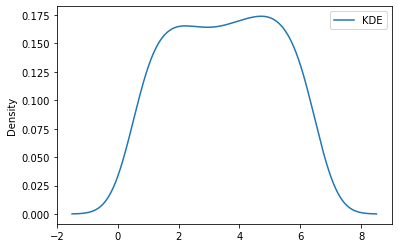

In [262]:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

In [266]:
norm_rv = sts.norm(0, 1)
norm_rv.rvs(10)

array([ 0.02593216, -0.46791918,  0.06419936,  0.73926026,  1.02824007,
        0.36409439,  0.78272787, -1.33000114,  0.13885398,  0.15618797])

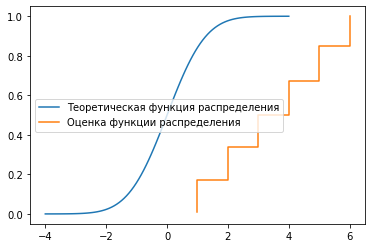

In [271]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='Теоретическая функция распределения')

# Воспользуемся библиотекой для оценки (спасибо питон!)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='Оценка функции распределения')
plt.legend();